In [7]:
# Read dataset and split to train and test data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the csv file to pandas dataframe
dataset = pd.read_csv('assets/output/pca.csv')

print(dataset)

# Split the dataset to X and Y
Y = dataset.loc[:,'visitor']
X = dataset.drop(['date','visitor'], axis=1)


# Split the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

            date  sulfur_0  sulfur_1  carbon_0  carbon_1  nitrogen_0  \
0     2008-10-01 -1.095433 -0.448566 -0.714159  1.526968   -0.214479   
1     2008-10-02 -0.278127  0.688212 -2.139045  1.194013    0.016164   
2     2008-10-03  0.422814 -0.340931 -1.711301  0.128490   -0.076112   
3     2008-10-04  0.822229 -0.310448 -1.425192  0.259266    0.131092   
4     2008-10-05  1.226037 -0.675317 -1.299931  0.225970    0.174518   
...          ...       ...       ...       ...       ...         ...   
3946  2020-01-27  2.925178 -0.210542  1.757143  0.526936    0.412261   
3947  2020-01-28  2.768109 -0.138540  1.820805  0.434330    1.095327   
3948  2020-01-29  3.015068  0.080627  2.457631  0.657614    0.806882   
3949  2020-01-30  3.953687  1.741454  2.607559  1.654633    0.403532   
3950  2020-01-31  2.819820  0.228666  2.084528  0.563960    1.014508   

      nitrogen_1  nitrogen_2   ozone_0   ozone_1  ...  highest temperature_0  \
0       0.170451   -0.114668 -0.745515 -0.894313  ...  

In [8]:
# Make the Model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': np.arange(100,700, 100),
        }

model = GradientBoostingRegressor(random_state=0)

grid_model = GridSearchCV(model, param_grid=grid_params, cv=5, n_jobs=-1)

In [9]:
# Fit the model
from sklearn.metrics import mean_squared_error


grid_model.fit(X_train, Y_train)

print('최적 하이퍼 파라미터:\n', grid_model.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_model.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300}
최고 예측 정확도: 0.1250


In [10]:
# Define the model with best parameters

model = GradientBoostingRegressor(**grid_model.best_params_)
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))


0.14105579708372562


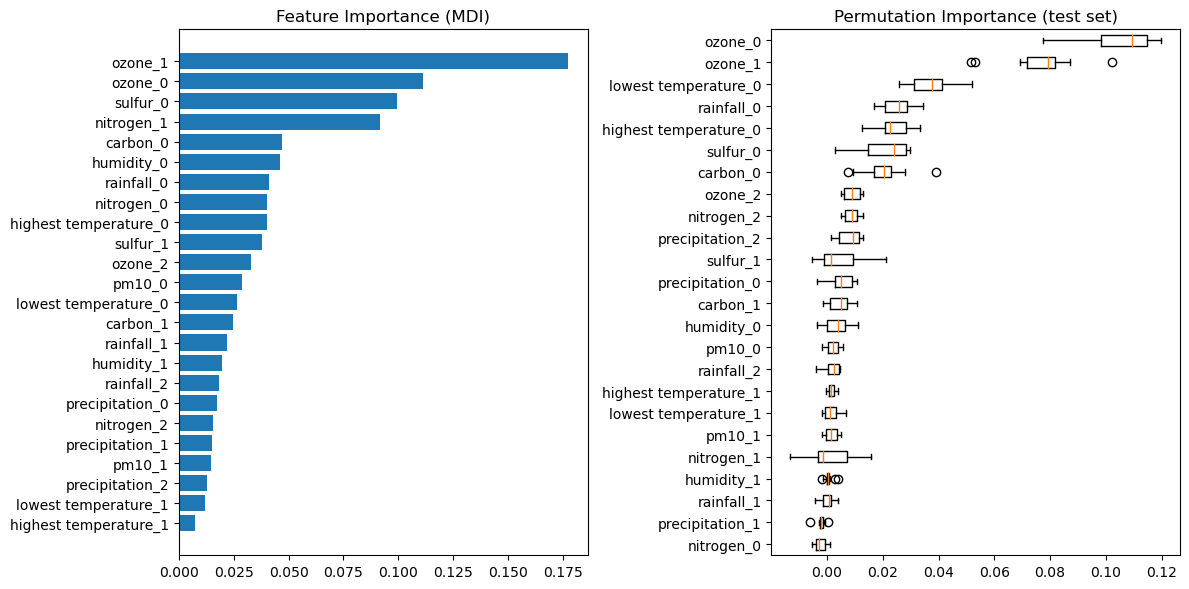

In [11]:
from sklearn.inspection import permutation_importance


feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [12]:
reduced_X = X_train.iloc[:, sorted_idx[30:]]

model = GradientBoostingRegressor(**grid_model.best_params_)
model.fit(reduced_X, Y_train)

print(model.score(X_test.iloc[:, sorted_idx[30:]], Y_test))

ValueError: at least one array or dtype is required